# Introduction 

This notebook is part of the project "End-to-End MLOps Pipeline for Financial Risk Assessment"

We use that to train our models with the Cefault of Credit Card Client Dataset (**Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science**) 

Also we use Kaggle for the process power that it has

# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

RANDOM_STATE = 2025

# Load-Prepair Dataset

In [2]:
# Load the data
data_df = pd.read_csv("/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")

# View the ehad of the data
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# See the datatype of each column, we will use it at the deployment
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [9]:
data_df[predictors].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [6]:
train_df, val_df = train_test_split(data_df, test_size=0.2,random_state=RANDOM_STATE, shuffle=True )

In [7]:
train_df, test_df = train_test_split(train_df, test_size=0.2,random_state=RANDOM_STATE, shuffle=True )

In [8]:
print(f'Training size is {train_df.shape}')
print(f'Testing size is {test_df.shape}')
print(f'Validation size is {val_df.shape}')

Training size is (19200, 25)
Testing size is (4800, 25)
Validation size is (6000, 25)


In [44]:
import json

# Replace i with the row number you want
i = 0  # for example
row_dict = val_df[predictors].iloc[i].to_dict()

# Convert NumPy types to native Python types for FastAPI compatibility
row_dict_clean = json.loads(json.dumps(row_dict, default=str))

# Print nicely formatted dictionary
import pprint
pprint.pprint(row_dict_clean)
print('-'*30)
print("Correct Values:",val_df[target].iloc[i])

{'AGE': 36.0,
 'BILL_AMT1': 167.0,
 'BILL_AMT2': 0.0,
 'BILL_AMT3': 0.0,
 'BILL_AMT4': 0.0,
 'BILL_AMT5': 0.0,
 'BILL_AMT6': 0.0,
 'EDUCATION': 1.0,
 'LIMIT_BAL': 210000.0,
 'MARRIAGE': 1.0,
 'PAY_0': -2.0,
 'PAY_2': -2.0,
 'PAY_3': -2.0,
 'PAY_4': -2.0,
 'PAY_5': -2.0,
 'PAY_6': -2.0,
 'PAY_AMT1': 0.0,
 'PAY_AMT2': 0.0,
 'PAY_AMT3': 0.0,
 'PAY_AMT4': 0.0,
 'PAY_AMT5': 0.0,
 'PAY_AMT6': 0.0,
 'SEX': 2.0}
------------------------------
Correct Values: 0


In [36]:
val_df[target].iloc[0]

0

Training and Testing set we will be used from us to train the model to be better. Validation set will be used for testing the deployment.

# Train Models

## Random Forest

In [15]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

In [16]:
rf_clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [17]:
rf_clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2025, verbose=False)

In [20]:
rf_preds = rf_clf.predict(test_df[predictors])

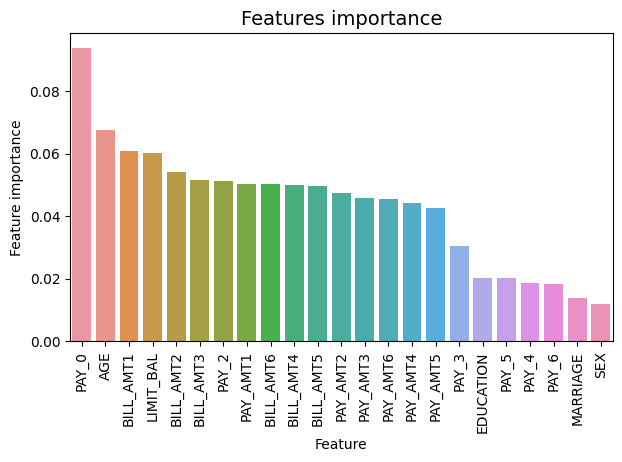

In [21]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rf_clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [22]:
roc_auc_score(test_df[target].values, rf_preds)

0.6682994586784825

## XGBoost

In [29]:
MAX_ROUNDS = 1000
EARLY_STOP = 50
VERBOSE_EVAL = 50 

# Prepare the train and train datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dtest, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [30]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.69354	valid-auc:0.70430
[50]	train-auc:0.77297	valid-auc:0.77623


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [14:38:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	train-auc:0.78107	valid-auc:0.77977
[150]	train-auc:0.78668	valid-auc:0.78236
[200]	train-auc:0.79063	valid-auc:0.78438
[250]	train-auc:0.79324	valid-auc:0.78584
[300]	train-auc:0.79518	valid-auc:0.78631
[350]	train-auc:0.79701	valid-auc:0.78746
[400]	train-auc:0.79899	valid-auc:0.78814
[450]	train-auc:0.80032	valid-auc:0.78824
[500]	train-auc:0.80208	valid-auc:0.78832
[550]	train-auc:0.80335	valid-auc:0.78839
[600]	train-auc:0.80470	valid-auc:0.78853
[617]	train-auc:0.80524	valid-auc:0.78853


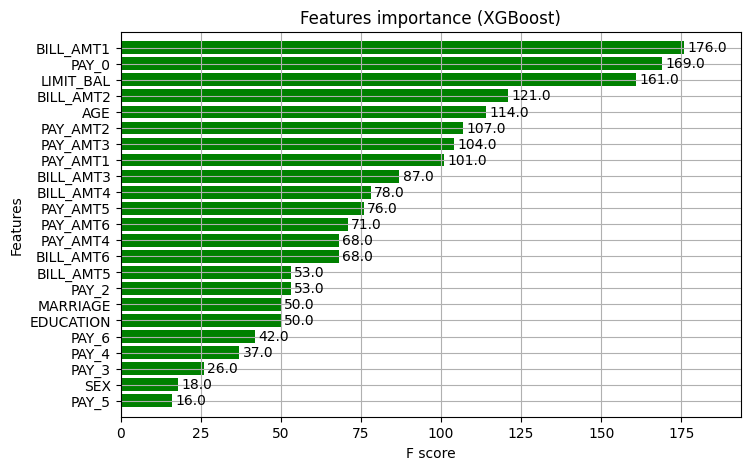

In [31]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [32]:
preds = model.predict(dtest)
roc_auc_score(test_df[target].values, preds)

0.7885372274851046

# Save model

In [33]:
import joblib

In [34]:
# Save the random forest model
joblib.dump(rf_clf, "random_forest_model.joblib")

# Save XGB model
model.save_model('xgb_model.json')